# **Universidad ICESI**

*Milton Orlando Sarria Paja*


---

# **Regularización en Modelos de Regresión**

La **regularización** es una herramienta clave en el aprendizaje automático para mejorar la generalización de los modelos predictivos. En este cuaderno, exploraremos cómo funciona la regularización, su relación con el sobreajuste y cómo se implementa en técnicas como Ridge, LASSO y Elastic-Net, utilizando visualizaciones para ilustrar estos conceptos.

---

## **1. Sobreajuste y Motivación de la Regularización**

Antes de hablar de regularización, necesitamos entender el problema que busca resolver: **el sobreajuste (overfitting)**.

- **¿Qué es el sobreajuste?**  
  Ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, capturando ruido o patrones específicos en lugar de las tendencias generales. Esto resulta en un modelo que funciona excelente en los datos de entrenamiento, pero falla al predecir en datos nuevos.

- **Implicaciones en modelos predictivos**:  
  Un modelo sobreajustado tiene coeficientes grandes y es muy sensible a pequeñas variaciones en los datos, lo que reduce su capacidad de generalización.

- **Análisis gráfico**:  
  Para ilustrar este problema, podemos usar gráficos que comparen modelos con y sin sobreajuste:  
  - Un modelo **subajustado** (underfitting) no captura bien los patrones y tiene alto error en entrenamiento y prueba.  
  - Un modelo **bien ajustado** equilibra el ajuste a los datos de entrenamiento y la generalización.  
  - Un modelo **sobreajustado** tiene curvas excesivamente complejas que pasan por cada punto de entrenamiento, pero fallan en datos nuevos.

![Sesgo vs Varianza](7_sesgo_varianza.png)  



- **Motivación de la regularización**:  
  La regularización introduce una penalización a la complejidad del modelo (es decir, a la magnitud de los coeficientes), lo que ayuda a prevenir el sobreajuste y mejora la generalización.

![Contornos Geométricos](1_contornos_l1_l2.png)

- **Contornos de Regularización L1 vs L2**:   
  Esta visualización muestra la geometría de las normas L1 (diamante para LASSO) y L2 (círculo para Ridge). Al restringir los coeficientes a estas regiones, la regularización limita la complejidad del modelo, evitando que "se ajuste demasiado" al ruido.


---

## **3. Técnicas de Regularización**

Exploremos las tres técnicas principales: **Ridge**, **LASSO** y **Elastic-Net**, sus fundamentos, diferencias y cómo se aplican en modelos de regresión.

### **3.1. Ridge Regression (Regularización L2)**

- **Fundamento**:  
  Ridge agrega una penalización basada en la suma de los cuadrados de los coeficientes a la función de costo tradicional de la regresión lineal:  

  $$ J(w) = \sum_i (y_i - w^\top x_i)^2 + \lambda \sum_d w_d^2 $$

  - $\lambda$: Parámetro de regularización que controla la fuerza de la penalización.  
  - A mayor $\lambda$, mayor es la restricción sobre los coeficientes.

Reduce la magnitud de los coeficientes sin eliminarlos, suavizando el modelo y disminuyendo el impacto de variables poco relevantes.


![Ridge](2_efecto_lambda_ridge.png)
- **Efecto del parámetro lambda en Ridge**:   
  Esta visualización muestra cómo diferentes valores de $\lambda$ afectan las predicciones y los coeficientes del modelo Ridge. A medida que $\lambda$ aumenta, las predicciones se suavizan y los coeficientes se acercan a cero (pero nunca llegan exactamente a cero), lo que ilustra cómo Ridge controla el sobreajuste.



### **3.2. LASSO Regression (Regularización L1)**

- **Fundamento**:  
  LASSO utiliza una penalización basada en la suma de los valores absolutos de los coeficientes:  

  $$ J(w) = \sum_i (y_i - w^\top x_i)^2 + \lambda \sum_d |w_d| $$

- **Propósito**:  
  A diferencia de Ridge, LASSO puede reducir algunos coeficientes exactamente a cero, funcionando como un método de **selección de variables**. Esto simplifica el modelo y lo hace más interpretable.

![LASSO](3_efecto_lambda_lasso.png)
- **Efecto del parámetro lambda en LASSO**:   
  Esta visualización muestra cómo, al aumentar $\lambda$ LASSO genera modelos más dispersos, con algunos coeficientes reducidos a cero. Esto destaca su capacidad para identificar las variables más importantes.

![Eliminar Coeficientes](4_camino_lasso.png)
- **Visualización adicional**: *Camino de Regularización para LASSO*  
  Representa la trayectoria de los coeficientes a medida que $\lambda$ varía, mostrando claramente cómo algunos coeficientes "desaparecen" (llegan a cero) mientras otros se mantienen.


### **3.3. Elastic-Net: Combinación de L1 y L2**

- **Fundamento**:  
  Elastic-Net combina las penalizaciones de Ridge y LASSO:  

  $$ J(w) = \sum_i (y_i - w^\top x_i)^2 + \lambda_1 \sum_d |w_d| + \lambda_2 \sum_d w_d^2 $$

  - $\lambda$: Controla la penalización L1 (LASSO).  
  - $\lambda_2$: Controla la penalización L2 (Ridge).  
  - `l1_ratio`: Proporción entre L1 y L2 $( \lambda_1/ (\lambda_1 + \lambda_2))$.

- **Propósito**:  
  Combina las ventajas de Ridge (manejo de multicolinealidad) y LASSO (selección de variables), siendo especialmente útil cuando hay muchas variables correlacionadas.

![Elastic-Net](5_elastic_net.png)
- **Elastic Net**:   
  Esta visualización ilustra cómo diferentes valores de `l1_ratio` afectan el modelo, mostrando el balance entre L1 y L2. Por ejemplo, un `l1_ratio` cercano a 1 se asemeja a LASSO, mientras que un valor cercano a 0 se parece a Ridge.


# Práctica de Regularización: Ridge, Lasso y Elastic Net

## Introducción

En esta práctica, aplicaremos las técnicas de regularización (Ridge, Lasso y Elastic Net) que hemos estudiado teóricamente. Trabajaremos con dos problemas:
1. Un problema de regresión lineal
2. Un problema de clasificación con regresión logística

Exploraremos cómo la regularización afecta al rendimiento del modelo, la selección de características y la interpretabilidad.

## Parte 1: Preparación del entorno

In [34]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [35]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [37]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [38]:
df=df.replace('?', np.nan)

In [39]:
df=df.drop('car name', axis=1)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

df = df.apply(lambda x: x.fillna(x.median()))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [68]:
# Dividir los datos en variables dependientes e independientes
X = df.drop('mpg', axis=1)

# Variable objetivo 
y = df[['mpg']]


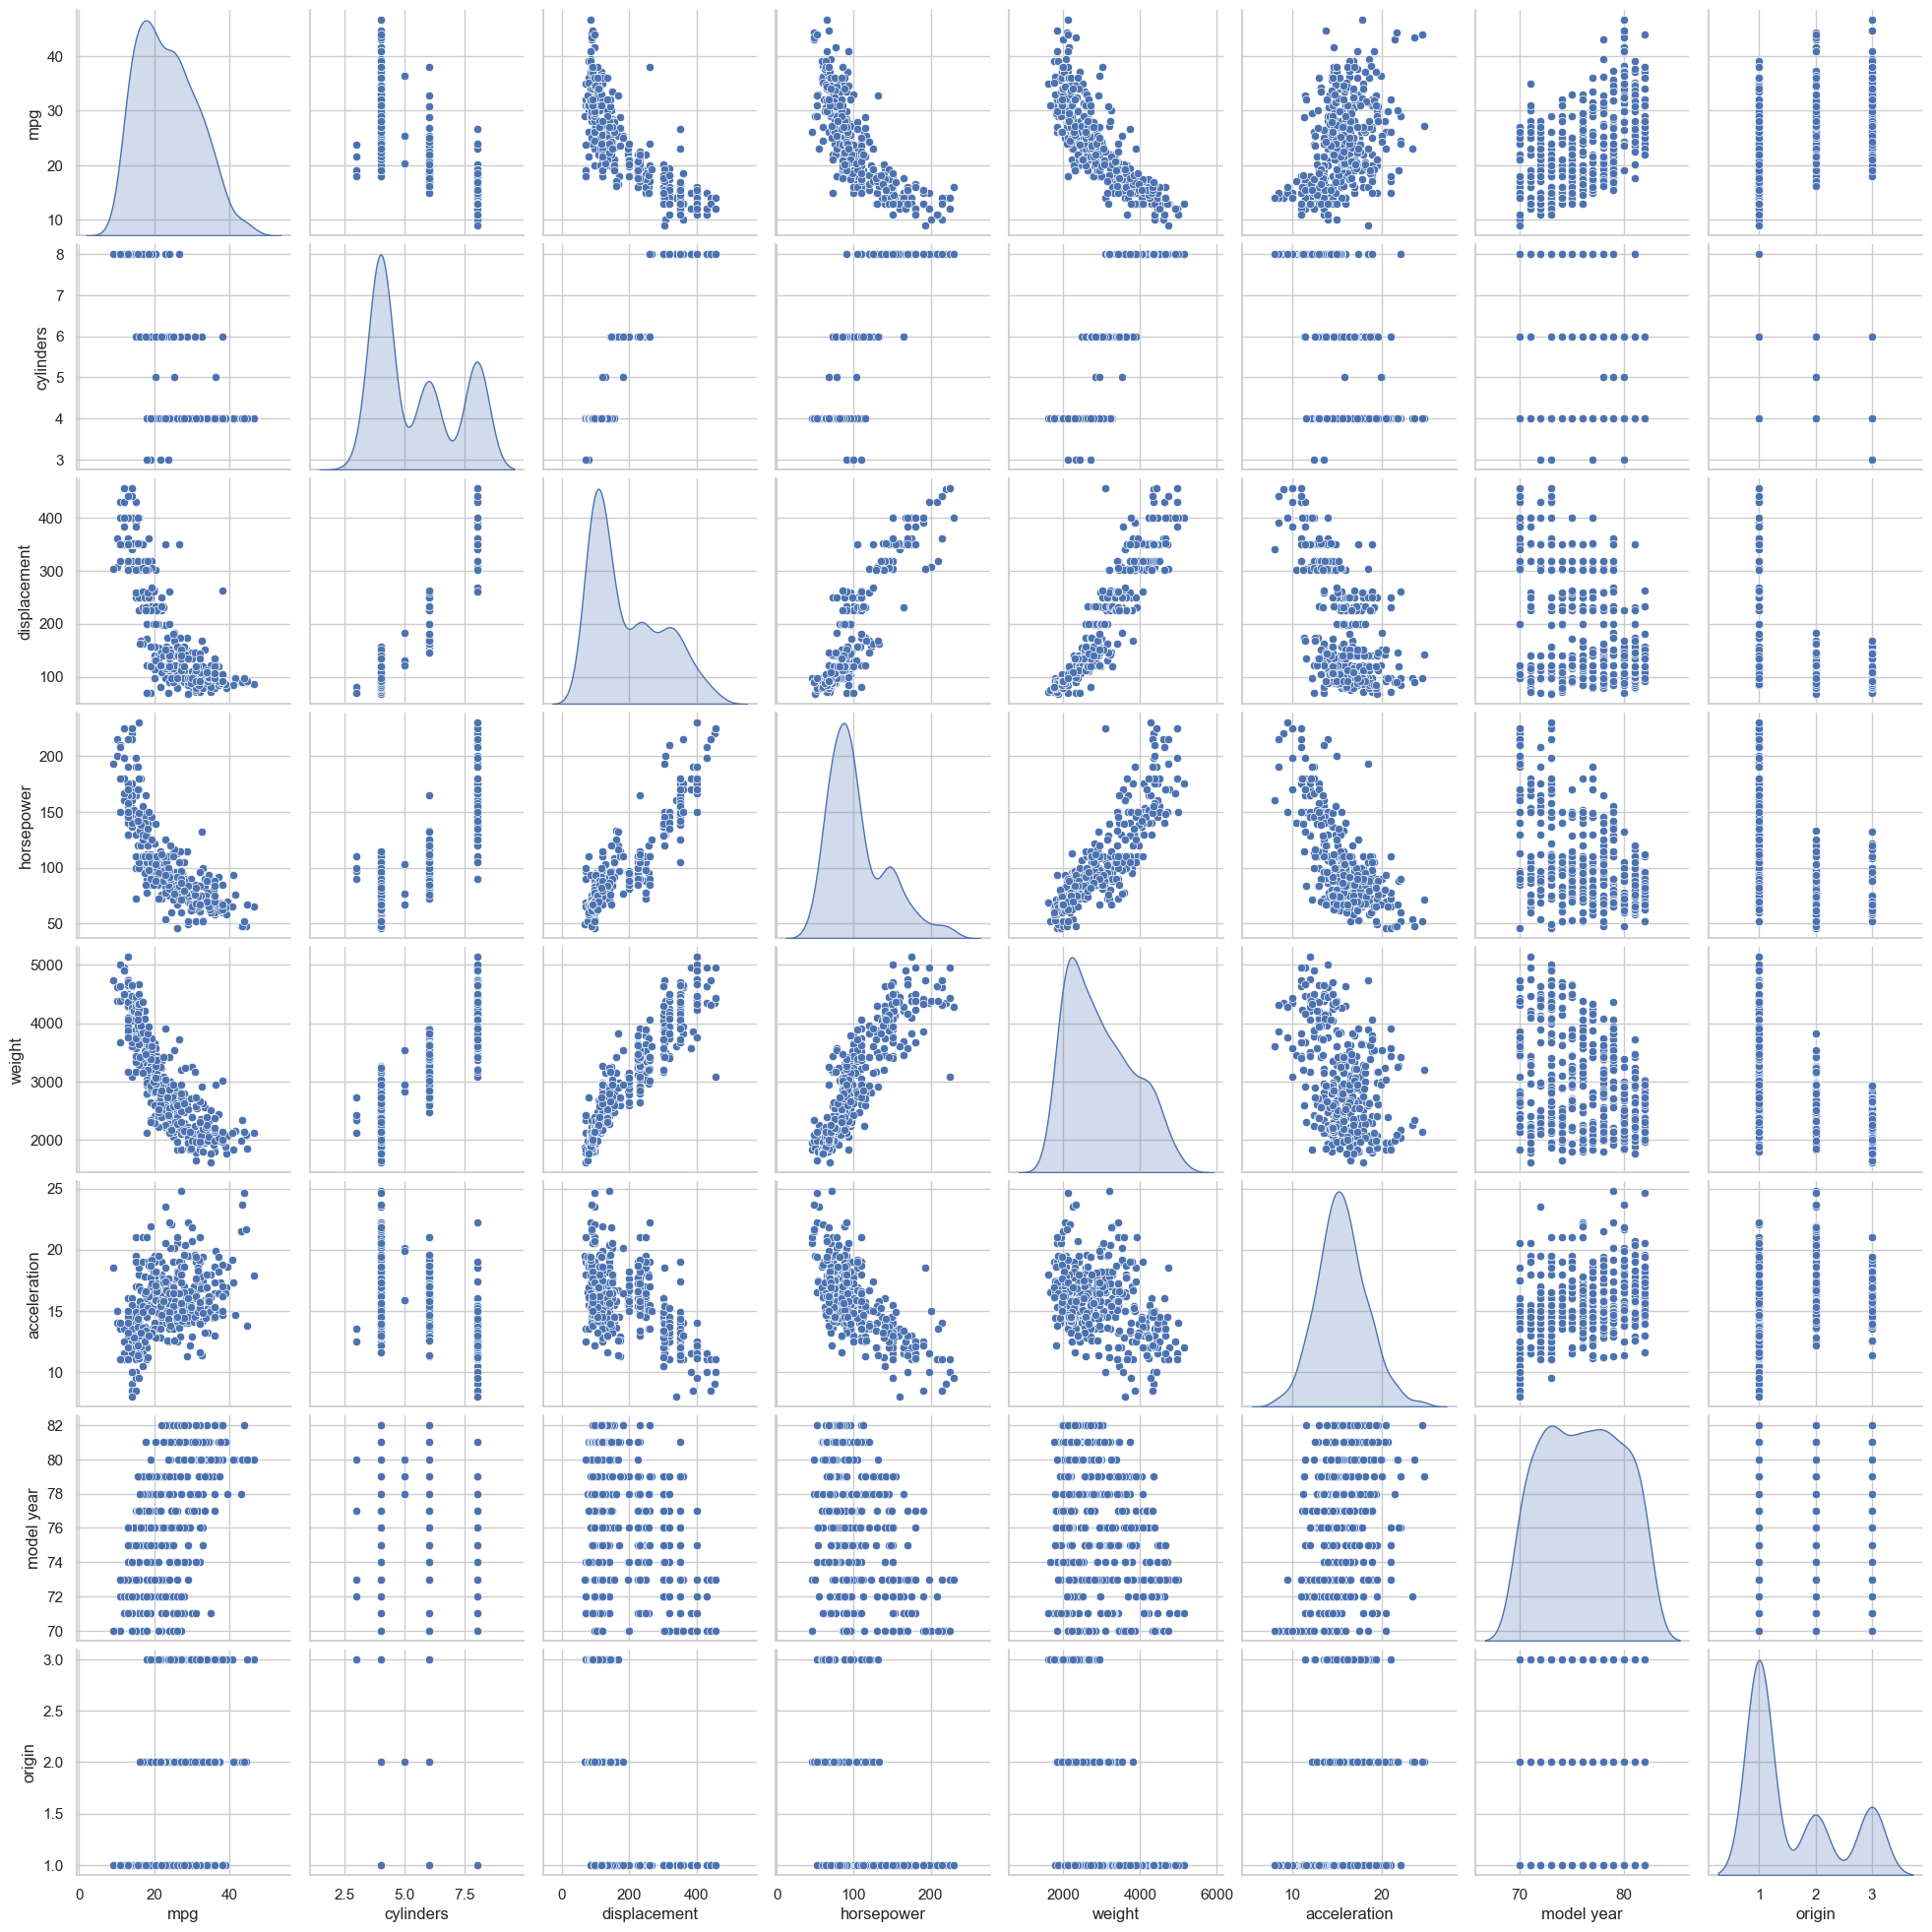

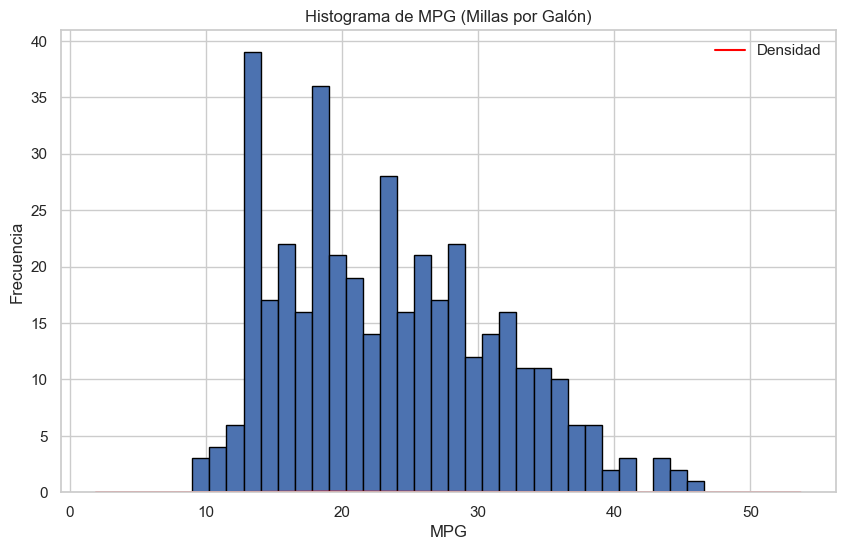

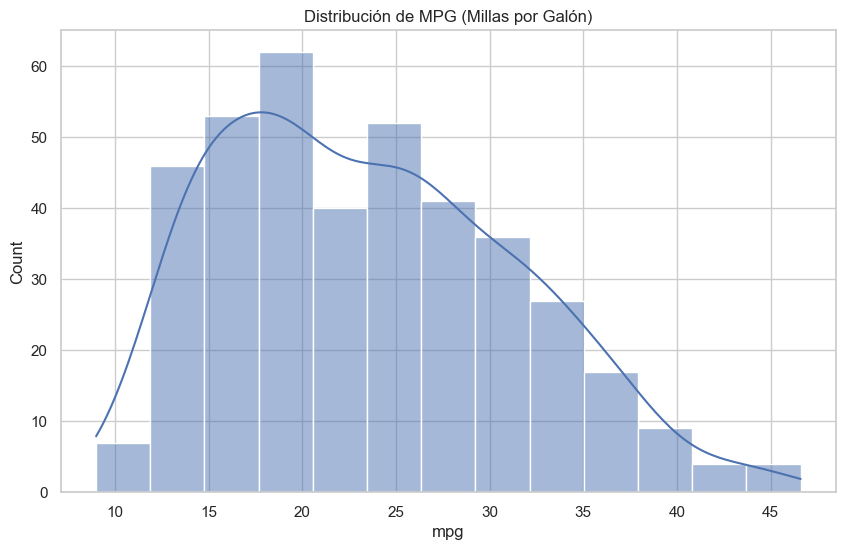

In [ ]:

sns.pairplot(df, diag_kind='kde')

import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['mpg'], bins=30, edgecolor='black')
plt.title('Histograma de MPG (Millas por Galón)')
plt.xlabel('MPG')
plt.ylabel('Frecuencia')

sns.kdeplot(data=df['mpg'], color='red', label='Densidad')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mpg', kde=True)
plt.title('Distribución de MPG (Millas por Galón)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)

y_numpy = y.values 
y_scaled = y_scaler.fit_transform(y_numpy.reshape(-1, 1))

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_scaled, 
    test_size=0.2,
    random_state=42
)

In [81]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Coeficientes de la regresión
print('Intercepto: ', regression_model.intercept_)
print('Coeficientes: ', regression_model.coef_)
print('R2 Test: ', regression_model.score(X_test, y_test))
print('R2 Train: ', regression_model.score(X_train, y_train))

Intercepto:  [-0.00220224]
Coeficientes:  [[-0.03412317  0.18970777 -0.06448907 -0.73095245  0.0242659   0.37608363
   0.13575844]]
R2 Test:  0.8475304239212407
R2 Train:  0.8140179390257464


In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Coeficientes de Ridge
print('Intercepto: ', ridge.intercept_)
print('Coeficientes: ', ridge.coef_)
print('R2 Test: ', ridge.score(X_test, y_test))
print('R2 Train: ', ridge.score(X_train, y_train))

Intercepto:  [-0.0023317]
Coeficientes:  [-0.03192336  0.1752743  -0.06771601 -0.71766608  0.02147852  0.37448654
  0.13513526]
R2 Test:  0.8474436559766303
R2 Train:  0.8139985939040725


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Coeficientes de Lasso
print('Intercepto: ', lasso.intercept_)
print('Coeficientes: ', lasso.coef_)
print('R2 Test: ', lasso.score(X_test, y_test))
print('R2 Train: ', lasso.score(X_train, y_train))


Intercepto:  [0.00206415]
Coeficientes:  [-0.         -0.         -0.00603757 -0.61647272  0.          0.29527907
  0.05333358]
R2 Test:  0.8448574882062923
R2 Train:  0.7940976668388275


Se puede observar que Lasso bajo la dimensionalidad de los datos, con 3 coeficientes iguales a cero. 
Lasso es útil para la selección de características.

Adicinalmente el $R^2$ de Lasso es menor que el de lo demás modelos, pero Lasso solo uso 5 dimensiones mientras que los otros dos usaron 8 dimensiones. El modelo Lasso es más factible porque las dimensiones son reducidas.


### Regresión Logistica

In [84]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Crear la variable binaria 'bueno'
df['bueno'] = (df['quality'] >= 6).astype(int)

# Separar características (X) y variable objetivo (y)
X = df.drop(['quality', 'bueno'], axis=1)
y = df['bueno']
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bueno
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [90]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística Normal:")
print("Accuracy:", accuracy_score(y_test, y_pred))


Regresión Logística Normal:
Accuracy: 0.740625


In [103]:
from sklearn.linear_model import LogisticRegressionCV

# Entrenar el modelo con Lasso (L1)
logreg_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=42)
logreg_lasso.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lasso = logreg_lasso.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística con Lasso:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))

# Coeficientes diferentes de cero (características seleccionadas)
print("Características seleccionadas por Lasso:")
print(X.columns[logreg_lasso.coef_[0] != 0])

Regresión Logística con Lasso:
Accuracy: 0.734375
Características seleccionadas por Lasso:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


### Aqui se puede observar que Lasso redujo la dimensionalidad de los datos a 8 y obtiene un accuracy muy similar a Ridge y la regresion logistica.

In [104]:
# Entrenar el modelo con Ridge (L2)
logreg_ridge = LogisticRegressionCV(penalty='l2', cv=5, random_state=42)
logreg_ridge.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_ridge = logreg_ridge.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística con Ridge:")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))


Regresión Logística con Ridge:
Accuracy: 0.74375


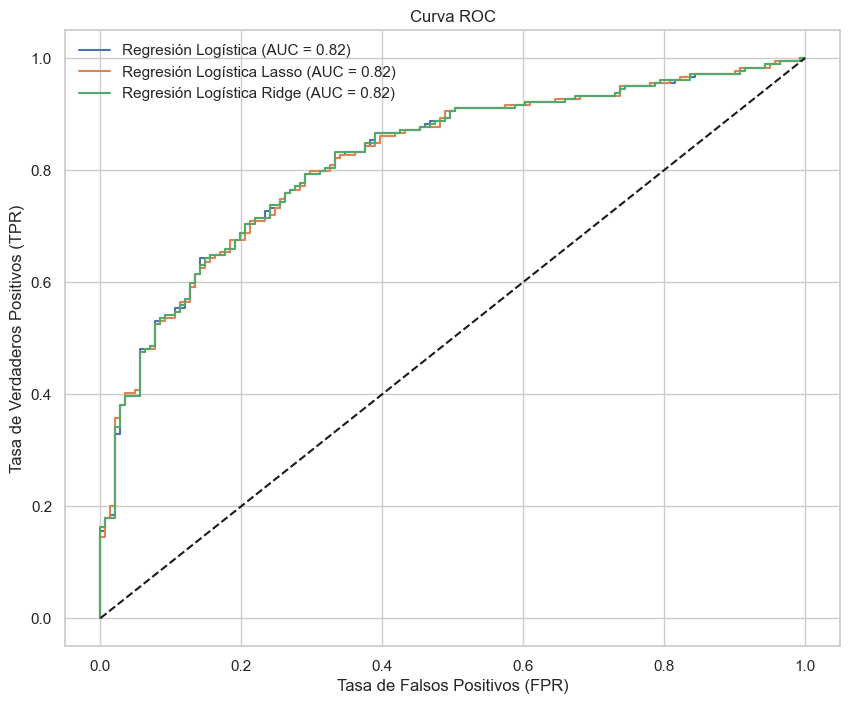

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
# Probabilidades de predicción
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_prob_lasso = logreg_lasso.predict_proba(X_test_scaled)[:, 1]
y_prob_ridge = logreg_ridge.predict_proba(X_test_scaled)[:, 1]
# Calcular ROC y AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)
auc_lasso = roc_auc_score(y_test, y_prob_lasso)

fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)
auc_ridge = roc_auc_score(y_test, y_prob_ridge)

# Graficar ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Regresión Logística (AUC = {auc_logreg:.2f})')
plt.plot(fpr_lasso, tpr_lasso, label=f'Regresión Logística Lasso (AUC = {auc_lasso:.2f})')
plt.plot(fpr_ridge, tpr_ridge, label=f'Regresión Logística Ridge (AUC = {auc_ridge:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()